# Tutorial 5:  Integration of time-series mouse embryonic brain

In this tutorial, we utilized a series of mouse brain datasets extracted from multiple developing mouse embryos, measured by Stereo-seq, to demonstrate the benefits of spatiAlign for downstream gene-level analysis.

- ### Import packages

In [ ]:
import scanpy as sc
from spatialign import Spatialign
from warnings import filterwarnings
from anndata import AnnData

filterwarnings("ignore")

In [ ]:
datasets = [
    "./raw_mob0.h5ad",
    "./raw_mob1.h5ad",
    "./raw_mob2.h5ad",
    "./raw_mob3.h5ad",
    "./raw_mob4.h5ad",
    "./raw_mob5.h5ad",
]

- ### Initialize        
Read datasets and load `spatiAlign` model

In [ ]:
model = Spatialign(
    *datasets,
    batch_key='batch',
    is_norm_log=True,
    is_scale=False,
    n_neigh=15,
    is_undirected=True,
    latent_dims=100,
    seed=42,
    gpu=0,
    save_path="./",
    is_verbose=False
)

- ### Training `spatiAlign` model               
`spatiAlign` aims to aligns the biological effects, while maximized preserving spots/cells biological variances in the latent embedding.             
It is possible to fine-tune the parameters (tau1, tau2, tau3) to optimize the model’s performance.

In [ ]:
model.train()

- ### Inference alignment datasets          
After model training, the learned lower-dimensional representations will be saved in `adata.obsm[‘correct’]`, and the higher-dimensional representations will be saved in `adata.X`.

In [ ]:
model.alignment()

- ### Visualizing inference datasets

In [ ]:
correct1 = sc.read_h5ad("./correct_mob0.h5ad")
correct2 = sc.read_h5ad("./correct_mob1.h5ad")
correct3 = sc.read_h5ad("./correct_mob2.h5ad")
correct4 = sc.read_h5ad("./correct_mob3.h5ad")
correct5 = sc.read_h5ad("./correct_mob4.h5ad")
correct6 = sc.read_h5ad("./correct_mob5.h5ad")

In [ ]:
merge_data = correct1.concatenate(correct2, correct3, correct4, correct5, correct6)

In [ ]:
sc.pp.neighbors(merge_data, use_rep="correct", random_state=42)
sc.tl.umap(merge_data, random_state=42)

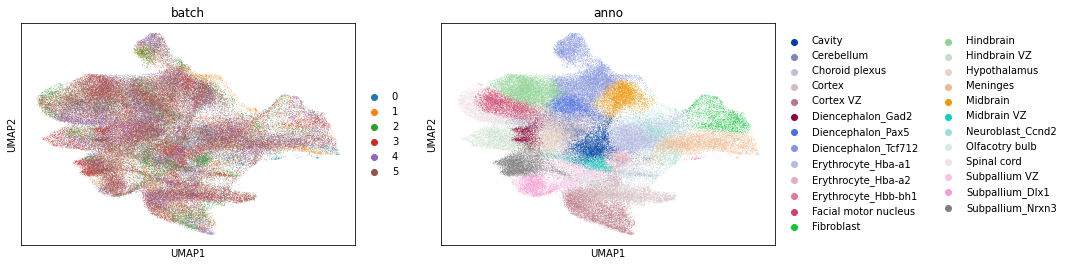

In [ ]:
sc.pl.umap(merge_data, color=["batch", "anno"])

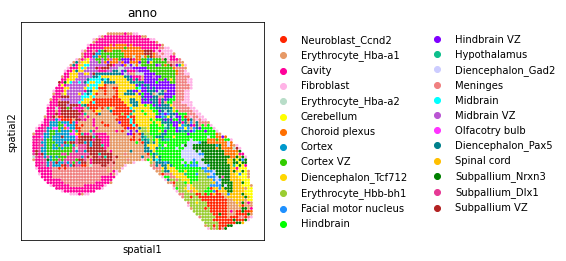

In [ ]:
sc.pl.spatial(correct1, color="anno", spot_size=1)

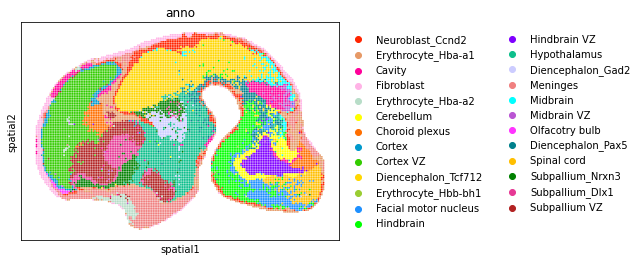

In [ ]:
sc.pl.spatial(correct2, color="anno", spot_size=1)

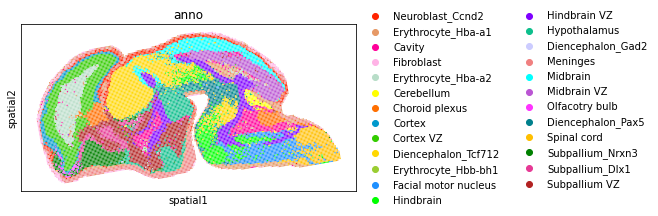

In [ ]:
sc.pl.spatial(correct3, color="anno", spot_size=1)

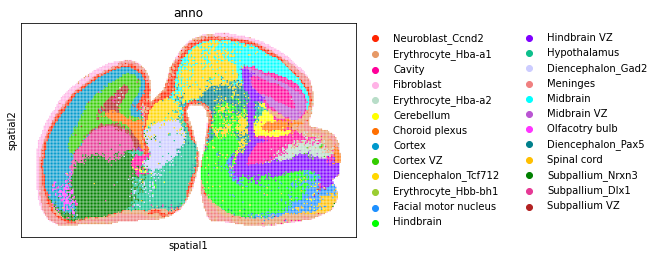

In [ ]:
sc.pl.spatial(correct4, color="anno", spot_size=1)

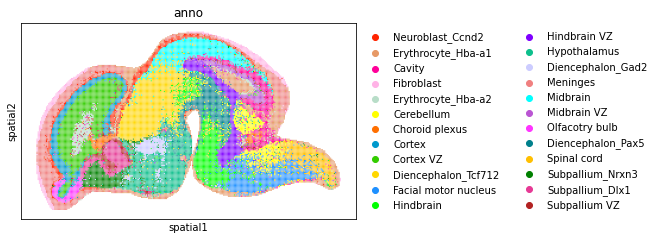

In [ ]:
sc.pl.spatial(correct5, color="anno", spot_size=1)

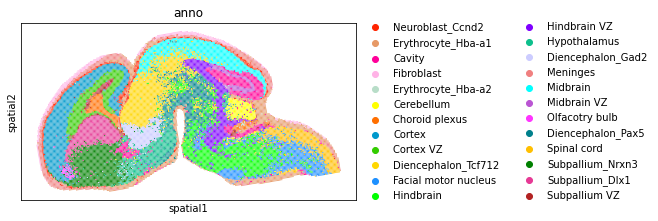

In [ ]:
sc.pl.spatial(correct6, color="anno", spot_size=1)